# Contact Tracer

One of the main problems with this approach is what is the information that we are going to use. I was looking in internet and I did not find any information about tracing people.
Once we have the data, we have to select the important informatio we are going to work with.

1) Information from the people, just about interaction between them?

2) How this interaction change the probability of been positive

## Qiskit Model
As I mentioned in our last meeting IBMQ has a quantum simulator with just 32 qubits. Therefore, we are restricted to work with this amount of people 

# Load the account of IBMQ
Remember that you need an account in IBMQ. Here is the link for creating the account https://quantum-computing.ibm.com 
There are real devices, but, those have a lot of noise and do not have enough number of qubits.

In [3]:
import qiskit as qk
from qiskit import IBMQ

provider = IBMQ.load_account()
backends = provider.backends()
names = []
for backend in backends:
    names.append(backend.name())
    
print(names)

ibmqfactory.load_account:WARNING:2020-06-26 22:01:48,865: Credentials are already in use. The existing account in the session will be replaced.


['ibmq_qasm_simulator', 'ibmqx2', 'ibmq_16_melbourne', 'ibmq_vigo', 'ibmq_ourense', 'ibmq_london', 'ibmq_burlington', 'ibmq_essex', 'ibmq_armonk', 'ibmq_rome']


# Quantum Simulator
The quantum simulator is our best candidate for simulating the propagation of the virus. 


In [6]:
backend = provider.get_backend('ibmq_qasm_simulator')
configuration = backend.configuration().to_dict()
n_qubits = backend.configuration().n_qubits
print(n_qubits)

32


## Circuit Representing the interactions 
This is how the circuit is going to be. We need the rules that will control the interaction between people. 

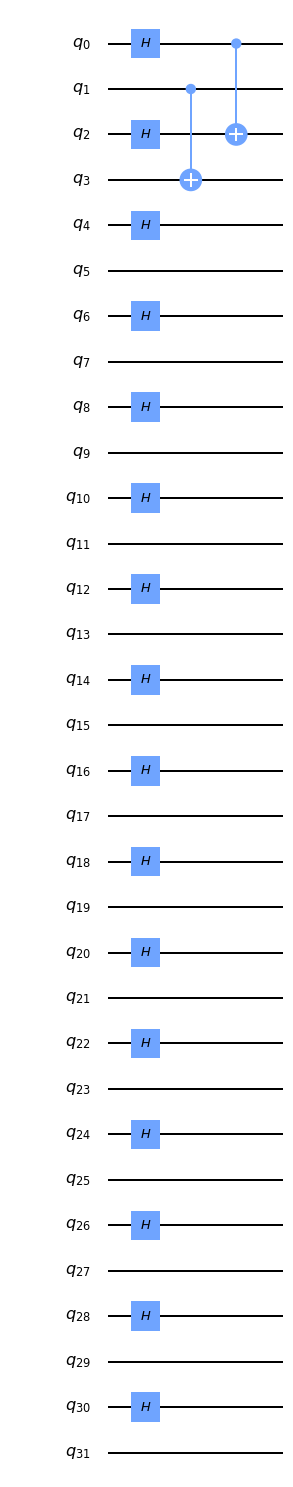

In [14]:
circuit = qk.QuantumCircuit(32)
circuit.h([i for i in range(n_qubits) if i % 2 == 0])
circuit.cx([0,1],[2,3])
circuit.draw('mpl')

## Example of contact
Imagine two people represented by the following qubits:

$$ P_1  = \alpha\left|0\right> + \beta\left|1\right>$$
$$ P_2  = \gamma\left|0\right> + \delta\left|1\right>$$

where $|\alpha|^2$ represent the probability of $P_1$ for not being infected and $|\beta|^2$ the probability of $P_1$ for being infected (The same for person two $P_2$). Therefore, the state is:

$$ P_1 \otimes P_2  = \alpha\gamma\left|00\right> + \alpha\delta\left|01\right> + \beta\gamma\left|10\right> +\beta\delta \left|11\right>$$

Applying a CNOT gate ($U_{CNOT}\left[P_1\otimes P_2\right] = P_1 \otimes (P_1 \oplus P_2)$):

$$ P_1 \otimes P_2  = \alpha\gamma\left|00\right> + \alpha\delta\left|01\right> + \beta\gamma\left|11\right> +\beta\delta \left|10\right>$$

In this case we are just interested in the last two cases which are the cases that tell us what happens with the second person if the first person is infected. We can eliminate the first two states starting the first person in the state $P_1 = \left|1\right>$. In this case $\alpha = 0$ and $\beta = 1$.

$$ P_1 \otimes P_2  = \gamma\left|10\right> + \delta \left|11\right>$$

Here, we have to apply a gate to the second qubit based on the interaction that this qubit had with the first qubit (In terms of people). Then, $\gamma$ and $\delta$ represent the interaction, we can use rotations around x to get this.Here, $\theta$ corresponds the degree of interaction of the second person with the first, $\theta = 0$ means the interaction does not generate infection and $\theta = \pi$ means the interaction generates infection.

$$R_x(\theta) = \begin{bmatrix} cos(\theta/2) & -i sin(\theta/2) \\ -i sin(\theta/2) & cos(\theta/2)\end{bmatrix}$$ 

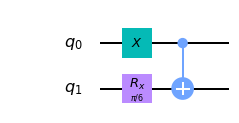

In [19]:
import numpy as np
circuit = qk.QuantumCircuit(2)
theta = np.pi/6
circuit.x(0)
circuit.rx(theta,1)
circuit.cx(0,1)
circuit.draw('mpl')